#SpaceShip Titanic Kaggle Competition

Addison Howard, Ashley Chow, Ryan Holbrook. (2022). Spaceship Titanic. Kaggle. https://kaggle.com/competitions/spaceship-titanic

#Import Libraries

In [11]:
import pandas as pd

In [12]:
import plotly.express as px

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
from mpl_toolkits.mplot3d import Axes3D
import xgboost as xgb
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

#Data

##Import data

In [16]:
!unzip /content/spaceship-titanic.zip -d /content


Archive:  /content/spaceship-titanic.zip
replace /content/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [17]:
df = pd.read_csv('train.csv', sep=',')

In [18]:
validation = pd.read_csv('/content/test.csv')

In [19]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [20]:
validation.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [21]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [23]:
df = df.drop(['Name'], axis=1)
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [24]:
validation = validation.drop(['Name'], axis=1)

In [25]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


##Data Exploration

###Categorical

In [26]:
fig = px.pie(df, names='Transported',
             title='Transported Distribution', color_discrete_sequence=px.colors.sequential.RdBu
            )
fig.update_traces(textposition='inside',textinfo='percent+label')

fig.show()

In [27]:
fig = px.pie(df, names='HomePlanet',
             title='HomePlanet Distribution',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textposition='inside',textinfo='percent+label')

fig.show()

In [28]:
fig = px.histogram(df, x='HomePlanet', color='Transported',
             title='% Transported Passengers by Home Planet',
             barmode='group', text_auto=True)

fig.show()

In [29]:
fig = px.histogram(df, x='HomePlanet', color='Destination',
             title='% Destination Passengers by Home Planet',
             barmode='group', text_auto=True
)

fig.show()

In [30]:
fig = px.pie(df, names='Destination',
             title='Destination Distribution',
             color_discrete_sequence=px.colors.sequential.RdBu,
            )
fig.update_traces(textposition='inside',textinfo='percent+label')

fig.show()

In [31]:
fig = px.histogram(df, x='Destination', color='Transported',
             title='% Transported Passengers by Destination',
             barmode='group', text_auto=True
)

fig.show()

In [32]:
fig = px.pie(df, names='VIP',
             title='VIP Distribution',
                 color_discrete_sequence=px.colors.sequential.RdBu
            )

fig.update_traces(textposition='inside',textinfo='percent+label')

fig.show()

In [33]:
fig = px.histogram(df, x='VIP', color='Transported',
             title='% Transported Passengers by VIP',
             barmode='group', text_auto=True
)

fig.show()

In [34]:
fig = px.histogram(df, x='Cabin',
             title='Cabin')

fig.show()

In [35]:
validation[['Cabin']] = validation[['Cabin']].fillna(value = validation['Cabin'].mode()[0])
df[['Cabin']] = df[['Cabin']].fillna(value = df['Cabin'].mode()[0])

In [36]:
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
validation[["Deck", "Cabin_num", "Side"]] = validation["Cabin"].str.split("/", expand=True)

In [37]:
fig = px.histogram(df, x='HomePlanet', color='Side',
             title='% Side Passengers by Home Planet',
             barmode='group', text_auto=True)

fig.show()

In [38]:

validation = validation.drop('Cabin', axis=1)

In [39]:
df = df.drop('Cabin', axis=1)

In [40]:
fig = px.pie(df, names='Deck',
             title='% Deck',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textposition='inside',textinfo='percent+label')

fig.show()

In [41]:
fig = px.histogram(df, x='Deck', color='Transported',
             title='% Transported Passengers by Deck',
             barmode='group', text_auto=True)

fig.show()

In [42]:
fig = px.pie(df, names='Side',
             title='% Side',
                 color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textposition='inside',textinfo='percent+label')

fig.show()

In [43]:
fig = px.histogram(df, x='Destination', color='Deck',
             title='% Deck Passengers by Destination',
             barmode='group', text_auto=True
)

fig.show()

In [44]:
fig = px.histogram(df, x='Side', color='Transported',
             title='% Transported Passengers by Side',
             barmode='group', text_auto=True)

fig.show()

In [45]:
fig = px.histogram(df, x='Destination', color='Side',
             title='% Side Passengers by Destination',
             barmode='group', text_auto=True)

fig.show()

In [46]:
fig = px.histogram(df, x='HomePlanet', color='Deck',
             title='% Deck Passengers by Home Planet',
             barmode='group', text_auto=True)

fig.show()

###Numerical

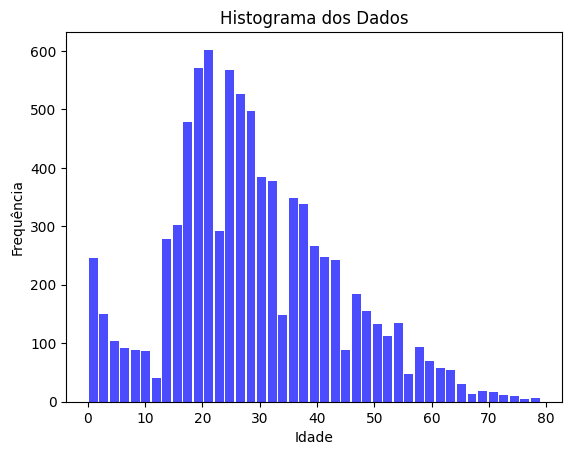

In [47]:

# Plotando o histograma
plt.hist(df['Age'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma dos Dados')

# Exibindo o gráfico
plt.show()


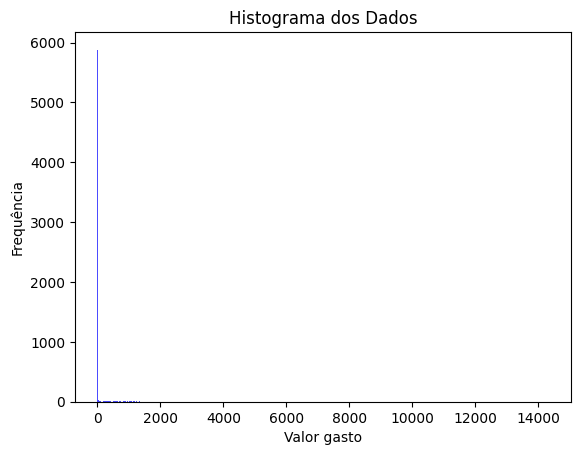

In [48]:
# Plotando o histograma
plt.hist(df['RoomService'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Valor gasto')
plt.ylabel('Frequência')
plt.title('Histograma dos Dados')

# Exibindo o gráfico
plt.show()

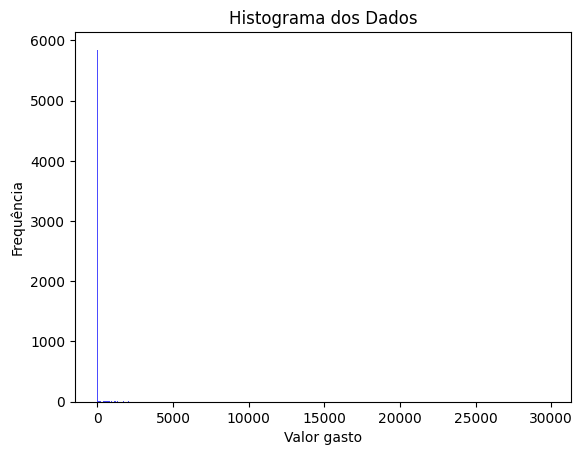

In [49]:
# Plotando o histograma
plt.hist(df['FoodCourt'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Valor gasto')
plt.ylabel('Frequência')
plt.title('Histograma dos Dados')

# Exibindo o gráfico
plt.show()

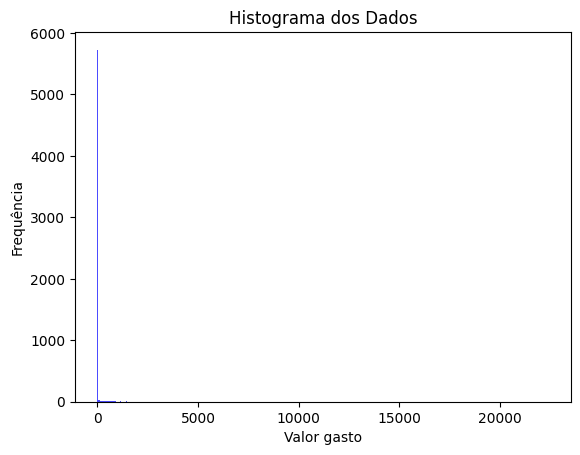

In [50]:
# Plotando o histograma
plt.hist(df['Spa'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Valor gasto')
plt.ylabel('Frequência')
plt.title('Histograma dos Dados')

# Exibindo o gráfico
plt.show()

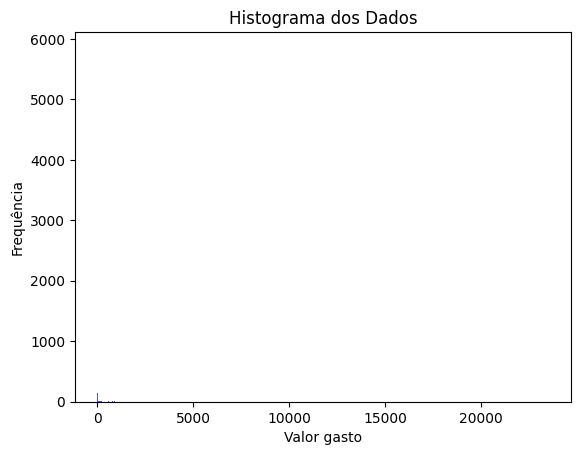

In [51]:
# Plotando o histograma
plt.hist(df['ShoppingMall'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Valor gasto')
plt.ylabel('Frequência')
plt.title('Histograma dos Dados')

# Exibindo o gráfico
plt.show()

##Data Pre-processing

In [52]:
df.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
Deck              0
Cabin_num         0
Side              0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Cabin_num     8693 non-null   object 
 14  Side          8693 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [54]:
df['VIP'].mode()

0    False
Name: VIP, dtype: object

In [55]:
df['Age'].median()

27.0

In [56]:
df[['Age']] = df[['Age']].fillna(value=df['Age'].mean())
df[['RoomService']] = df[['RoomService']].fillna(value=0)
df[['FoodCourt']] = df[['FoodCourt']].fillna(value=0)
df[['VIP']] = df[['VIP']].fillna(value=0)
df[['CryoSleep']] = df[['CryoSleep']].fillna(value=0)
df[['ShoppingMall']] = df[['ShoppingMall']].fillna(value=df[['ShoppingMall']].median())

In [57]:
validation[['Age']] = validation[['Age']].fillna(value=validation['Age'].mean())
validation[['RoomService']] = validation[['RoomService']].fillna(value=0)
validation[['FoodCourt']] = validation[['FoodCourt']].fillna(value=0)
validation[['VIP']] = validation[['VIP']].fillna(value=0)
validation[['CryoSleep']] = validation[['CryoSleep']].fillna(value=0)
validation[['ShoppingMall']] = validation[['ShoppingMall']].fillna(value=validation[['ShoppingMall']].median())

In [58]:
df.isna().sum().sort_values(ascending=False)

HomePlanet      201
VRDeck          188
Spa             183
Destination     182
PassengerId       0
CryoSleep         0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Transported       0
Deck              0
Cabin_num         0
Side              0
dtype: int64

In [59]:
label = "Transported"
df[label] = df[label].astype(float)

In [60]:
df['HomePlanet'].mode()[0]

'Earth'

In [61]:
df[['HomePlanet']] = df[['HomePlanet']].fillna(value = df['HomePlanet'].mode()[0])
df[['Spa']] = df[['Spa']].fillna(value = df['Spa'].mode()[0])
df[['Destination']] = df[['Destination']].fillna(value = df['Destination'].mode()[0])
df[['VRDeck']] = df[['VRDeck']].fillna(value = df['VRDeck'].mode()[0])

In [62]:
validation[['HomePlanet']] = validation[['HomePlanet']].fillna(value = validation['HomePlanet'].mode()[0])
validation[['Spa']] = validation[['Spa']].fillna(value = validation['Spa'].mode()[0])
validation[['Destination']] = validation[['Destination']].fillna(value = validation['Destination'].mode()[0])
validation[['VRDeck']] = validation[['VRDeck']].fillna(value = validation['VRDeck'].mode()[0])

In [63]:
df.isna().sum().sort_values(ascending=False)

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Cabin_num       0
Side            0
dtype: int64

In [64]:
df['VIP'] = df['VIP'].astype(float)
df['CryoSleep'] = df['CryoSleep'].astype(float)

In [65]:
validation['VIP'] = validation['VIP'].astype(float)
validation['CryoSleep'] = validation['CryoSleep'].astype(float)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   float64
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   float64
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   float64
 12  Deck          8693 non-null   object 
 13  Cabin_num     8693 non-null   object 
 14  Side          8693 non-null   object 
dtypes: float64(9), object(6)
memory usage: 1018.8+ KB


In [67]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   float64
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   float64
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
 11  Deck          4277 non-null   object 
 12  Cabin_num     4277 non-null   object 
 13  Side          4277 non-null   object 
dtypes: float64(8), object(6)
memory usage: 467.9+ KB


In [68]:
df['Passenger_Groups'] = df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(float, 64)
validation['Passenger_Groups'] = validation['PassengerId'].apply(lambda x: x.split('_')[0]).astype(float, 64)

In [69]:
df['Expenses'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
validation['Expenses'] = validation[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

bins = [0, 18, 30, 40, 50, 60, 70, float('inf')]

labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
validation['Age_Group'] = pd.cut(validation['Age'], bins=bins, labels=labels, right=False)

df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side,Passenger_Groups,Expenses,Age_Group
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,0,P,1.0,0.0,31-40
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,F,0,S,2.0,736.0,19-30
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,A,0,S,3.0,10383.0,51-60
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,A,0,S,3.0,5176.0,31-40
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,F,1,S,4.0,1091.0,0-18


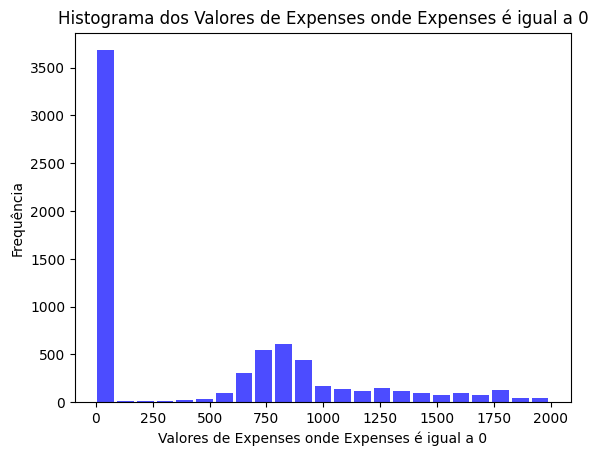

In [70]:
# Filtrando os dados onde 'Expenses' é igual a 0
dados_filtrados = df[df['Expenses']<2000]['Expenses']

# Plotando o histograma
plt.hist(dados_filtrados, bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Valores de Expenses onde Expenses é igual a 0')
plt.ylabel('Frequência')
plt.title('Histograma dos Valores de Expenses onde Expenses é igual a 0')

# Exibindo o gráfico
plt.show()

In [71]:

bins = [0, 1, float('inf')]

labels = ['0', '1+']

df['ExpensesGroup'] = pd.cut(df['Expenses'], bins=bins, labels=labels, right=False)
validation['ExpensesGroup'] = pd.cut(validation['Expenses'], bins=bins, labels=labels, right=False)

df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side,Passenger_Groups,Expenses,Age_Group,ExpensesGroup
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,0,P,1.0,0.0,31-40,0
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,F,0,S,2.0,736.0,19-30,1+
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,A,0,S,3.0,10383.0,51-60,1+
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,A,0,S,3.0,5176.0,31-40,1+
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,F,1,S,4.0,1091.0,0-18,1+


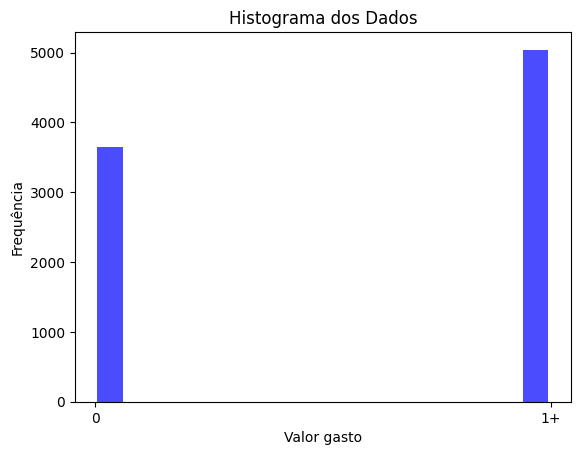

In [72]:
# Plotando o histograma
plt.hist(df['ExpensesGroup'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Valor gasto')
plt.ylabel('Frequência')
plt.title('Histograma dos Dados')

# Exibindo o gráfico
plt.show()

In [75]:
df['Cabin_num'].unique()


array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object)

In [81]:
df['CabinLocation'] = df['Cabin_num'].astype(str) + '_' + df['Side']

In [83]:
df['Cabin_num'] = pd.to_numeric(df['Cabin_num'], errors='coerce')


In [96]:
# Definir os limites dos intervalos
intervalos = [0, 300, 600, 900, 1200, 1500, 1800, 1901]  # Limites ordenados monotonicamente

# Definir os rótulos dos intervalos considerando o lado
rotulos = [f'{inicio}-{fim-1}_{lado}' for inicio, fim, lado in zip(intervalos[:-1], intervalos[1:], df['Side'])]

# Adicionar um rótulo para os valores maiores que 1900
rotulos.append('1901+')

# Usar pd.cut para criar a coluna 'CabinRange' com base nos intervalos e rótulos
df['CabinRange'] = pd.cut(df['Cabin_num'], bins=[-1] + intervalos, labels=rotulos, right=False)



In [97]:
df['CabinRange'].unique()

['300-599_S', '900-1199_S', '600-899_S', '1200-1499_S', '1500-1799_P', '1800-1900_S', '1901+']
Categories (8, object): ['0-299_P' < '300-599_S' < '600-899_S' < '900-1199_S' < '1200-1499_S' <
                         '1500-1799_P' < '1800-1900_S' < '1901+']

In [111]:
validation['Cabin_num'] = pd.to_numeric(validation['Cabin_num'], errors='coerce')
# Definir os limites dos intervalos
intervalos = [0, 300, 600, 900, 1200, 1500, 1800, 1901]  # Limites ordenados monotonicamente

# Definir os rótulos dos intervalos considerando o lado
rotulos = [f'{inicio}-{fim-1}_{lado}' for inicio, fim, lado in zip(intervalos[:-1], intervalos[1:], validation['Side'])]

# Adicionar um rótulo para os valores maiores que 1900
rotulos.append('1901+')

# Usar pd.cut para criar a coluna 'CabinRange' com base nos intervalos e rótulos
validation['CabinRange'] = pd.cut(validation['Cabin_num'], bins=[-1] + intervalos, labels=rotulos, right=False)

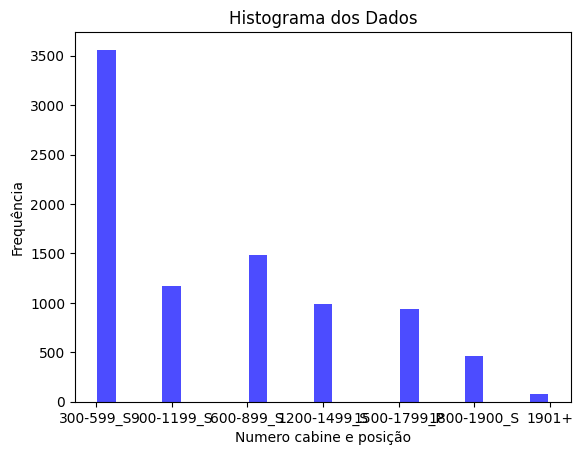

In [98]:
# Plotando o histograma
plt.hist(df['CabinRange'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Numero cabine e posição')
plt.ylabel('Frequência')
plt.title('Histograma dos Dados')

# Exibindo o gráfico
plt.show()

In [101]:
df['Num_Group']= df.groupby('Passenger_Groups')['PassengerId'].transform('count')

In [109]:
validation['Num_Group']= validation.groupby('Passenger_Groups')['PassengerId'].transform('count')

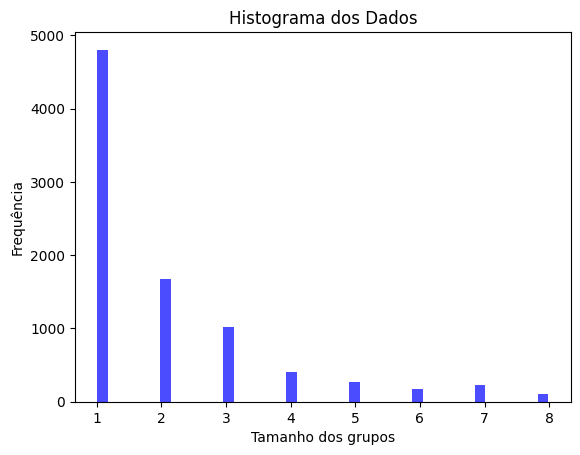

In [103]:
# Plotando o histograma
plt.hist(df['Num_Group'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Tamanho dos grupos')
plt.ylabel('Frequência')
plt.title('Histograma dos Dados')

# Exibindo o gráfico
plt.show()

In [102]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Deck,Cabin_num,Side,Passenger_Groups,Expenses,Age_Group,ExpensesGroup,CabinLocation,CabinRange,Num_Group
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,...,B,0,P,1.0,0.0,31-40,0,0_P,300-599_S,1
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,...,F,0,S,2.0,736.0,19-30,1+,0_S,300-599_S,1
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,...,A,0,S,3.0,10383.0,51-60,1+,0_S,300-599_S,2
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,...,A,0,S,3.0,5176.0,31-40,1+,0_S,300-599_S,2
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,...,F,1,S,4.0,1091.0,0-18,1+,1_S,300-599_S,1


##Dados Treino e teste

In [104]:

X = df[['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','Spa','VRDeck','ShoppingMall','Deck','Side','Passenger_Groups','Age_Group','ExpensesGroup', 'Num_Group','CabinRange' ]].copy()

y = df['Transported'].copy()


In [112]:
X.head()

,Age,RoomService,FoodCourt,Spa,VRDeck,ShoppingMall,HomePlanet,CryoSleep,VIP,Destination,Deck,Side,Age_Group,Num_Group,Passenger_Groups,ExpensesGroup,CabinRange
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,2,1,0,2,0,0,0,4
1,24.0,109.0,9.0,549.0,44.0,25.0,0,0,0,2,5,1,1,0,1,1,4
2,58.0,43.0,3576.0,6715.0,49.0,0.0,1,0,1,2,0,1,4,1,2,1,4
3,33.0,0.0,1283.0,3329.0,193.0,371.0,1,0,0,2,0,1,2,1,2,1,4
4,16.0,303.0,70.0,565.0,2.0,151.0,0,0,0,2,5,1,0,0,3,1,4


In [105]:
from sklearn.preprocessing import LabelEncoder

In [107]:

# Codificar colunas categóricas
colunas_categoricas = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination', 'Deck', 'Side', 'Age_Group','Num_Group', 'Passenger_Groups', 'ExpensesGroup', 'CabinRange']
encoder = LabelEncoder()

dados_categoricos_encoded = X[colunas_categoricas].apply(encoder.fit_transform)

X = pd.concat([X.drop(columns=colunas_categoricas), dados_categoricos_encoded], axis=1)


In [113]:


# Codificar colunas categóricas
colunas_categoricas = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination', 'Deck', 'Side', 'Age_Group','Num_Group', 'Passenger_Groups', 'ExpensesGroup', 'CabinRange']
encoder = LabelEncoder()

dados_categoricos_encoded = validation[colunas_categoricas].apply(encoder.fit_transform)

validation = pd.concat([validation.drop(columns=colunas_categoricas), dados_categoricos_encoded], axis=1)


In [114]:
validation.drop(columns=['Cabin_num','PassengerId'],inplace=True)

In [115]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=123)

In [116]:
print(X_treino.shape, y_treino.shape)
print(X_teste.shape, y_teste.shape)
print(validation.shape)


(6954, 17) (6954,)
(1739, 17) (1739,)
(4277, 18)


In [122]:
X_treino.reset_index(inplace=True)
X_teste.reset_index(inplace=True)


In [119]:
validation.drop('Expenses', axis=1, inplace=True)

In [123]:
X_treino.head()

,index,Age,RoomService,FoodCourt,Spa,VRDeck,ShoppingMall,HomePlanet,CryoSleep,VIP,Destination,Deck,Side,Age_Group,Num_Group,Passenger_Groups,ExpensesGroup,CabinRange
0,7074,18.0,0.0,732.0,13.0,47.0,2.0,0,0,0,2,5,0,1,0,5064,1,2
1,6710,32.0,0.0,0.0,0.0,0.0,0.0,1,1,0,2,2,1,2,1,4773,0,4
2,2569,36.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1,0,2,0,1848,0,4
3,3850,23.0,0.0,0.0,0.0,0.0,0.0,1,0,0,2,1,0,1,0,2764,0,4
4,7450,35.0,0.0,246.0,42.0,3730.0,25.0,1,0,0,2,1,0,2,1,5352,1,4


In [124]:
X_teste.head()

,index,Age,RoomService,FoodCourt,Spa,VRDeck,ShoppingMall,HomePlanet,CryoSleep,VIP,Destination,Deck,Side,Age_Group,Num_Group,Passenger_Groups,ExpensesGroup,CabinRange
0,5734,18.00000,14.0,2.0,610.0,0.0,144.0,0,0,0,2,6,1,1,0,4106,1,0
1,8392,28.00000,0.0,3751.0,5025.0,11741.0,0.0,1,0,0,0,2,0,1,0,6008,1,5
2,8120,29.00000,1.0,764.0,265.0,1539.0,1.0,1,0,0,0,0,0,1,0,5817,1,4
3,769,28.82793,1227.0,42.0,0.0,0.0,1.0,2,0,0,2,5,1,1,3,542,1,4
4,5382,18.00000,0.0,625.0,0.0,356.0,0.0,0,0,0,2,4,0,1,0,3871,1,5


In [125]:
X_teste.drop(columns=['index'], inplace=True)

In [126]:
X_treino.drop(columns=['index'], inplace=True)

#Modelos Scikit-learn

#Baseline

In [127]:

kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(X_treino)


km_pred = kmeans.predict(X_teste)

accuracy = accuracy_score(y_teste, km_pred)
print('K-means accuracy:', round(accuracy, 3))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



K-means accuracy: 0.491


In [128]:
!pip install catboost xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Substitua essas linhas com seus dados e target
# X representa suas features, e y é a variável alvo que você está tentando prever
# Certifique-se de dividir seus dados em conjuntos de treinamento e teste
# Aqui, estou usando dados fictícios como exemplo
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=123)

# Defina os modelos que você deseja testar
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'CatBoost': CatBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Crie um dataframe para armazenar os resultados
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Loop através dos modelos
for model_name, model in models.items():
    # Treine o modelo
    model.fit(X_treino, y_treino)

    # Faça previsões
    predictions = model.predict(X_teste)

    # Calcule a acurácia
    accuracy = accuracy_score(y_teste, predictions)

    # Adicione os resultados ao dataframe
    results_df = results_df.append({'Model': model_name, 'Accuracy': accuracy}, ignore_index=True)

# Imprima a tabela de resultados
print(results_df)


<ipython-input-129-71b22678534a>:39: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-129-71b22678534a>:39: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-129-71b22678534a>:39: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Learning rate set to 0.022275
0:	learn: 0.6811176	total: 109ms	remaining: 1m 48s
1:	learn: 0.6709058	total: 134ms	remaining: 1m 6s
2:	learn: 0.6615505	total: 144ms	remaining: 47.9s
3:	learn: 0.6531007	total: 167ms	remaining: 41.5s
4:	learn: 0.6446772	total: 177ms	remaining: 35.3s
5:	learn: 0.6365523	total: 196ms	remaining: 32.5s
6:	learn: 0.6285684	total: 210ms	remaining: 29.8s
7:	learn: 0.6209632	total: 240ms	remaining: 29.8s
8:	learn: 0.6135100	total: 270ms	remaining: 29.8s
9:	learn: 0.6085261	total: 282ms	remaining: 27.9s
10:	learn: 0.6025825	total: 321ms	remaining: 28.8s
11:	learn: 0.5978445	total: 332ms	remaining: 27.3s
12:	learn: 0.5917566	total: 353ms	remaining: 26.8s
13:	learn: 0.5866199	total: 368ms	remaining: 25.9s
14:	learn: 0.5813907	total: 387ms	remaining: 25.4s
15:	learn: 0.5763143	total: 412ms	remaining: 25.4s
16:	learn: 0.5725463	total: 426ms	remaining: 24.6s
17:	learn: 0.5672584	total: 470ms	remaining: 25.6s
18:	learn: 0.5628710	total: 513ms	remaining: 26.5s
19:	learn:

<ipython-input-129-71b22678534a>:39: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



              Model  Accuracy
0      RandomForest  0.818252
1  GradientBoosting  0.813650
2               SVM  0.789877
3          CatBoost  0.823620
4           XGBoost  0.812500


<ipython-input-129-71b22678534a>:39: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



#CatBoost

In [130]:
from catboost import CatBoostClassifier, Pool

In [131]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [132]:
# Customized scoring function
scorer = make_scorer(accuracy_score)

# Grid Search for CatBoost
catboost_model = CatBoostClassifier()
catboost_parameters = {'depth': [4, 5, 10], 'learning_rate': [0.1, 0.225, 0.3], 'iterations': [100, 250, 300]}

catboost_grid_search = GridSearchCV(catboost_model, catboost_parameters, scoring=scorer, cv=3)
catboost_grid_search.fit(X_treino, y_treino)
print("CatBoost Grid Search Best Parameters:", catboost_grid_search.best_params_)

# Random Search for CatBoost
catboost_random_search = RandomizedSearchCV(catboost_model, catboost_parameters, n_iter=10, scoring=scorer, cv=3)
catboost_random_search.fit(X_treino, y_treino)
print("CatBoost Random Search Best Parameters:", catboost_random_search.best_params_)

A saída de streaming foi truncada nas últimas 5000 linhas.
1:	learn: 0.6385070	total: 4.07ms	remaining: 200ms
2:	learn: 0.6173742	total: 6.23ms	remaining: 202ms
3:	learn: 0.5978215	total: 11.1ms	remaining: 265ms
4:	learn: 0.5814898	total: 15.6ms	remaining: 296ms
5:	learn: 0.5695105	total: 19.4ms	remaining: 304ms
6:	learn: 0.5577580	total: 21.5ms	remaining: 286ms
7:	learn: 0.5471437	total: 23.9ms	remaining: 274ms
8:	learn: 0.5373041	total: 26.1ms	remaining: 264ms
9:	learn: 0.5296366	total: 28.3ms	remaining: 254ms
10:	learn: 0.5216770	total: 30.5ms	remaining: 247ms
11:	learn: 0.5146254	total: 32.7ms	remaining: 240ms
12:	learn: 0.5076939	total: 34.7ms	remaining: 232ms
13:	learn: 0.5031054	total: 36.7ms	remaining: 226ms
14:	learn: 0.4981809	total: 38.6ms	remaining: 219ms
15:	learn: 0.4933815	total: 40.7ms	remaining: 214ms
16:	learn: 0.4890016	total: 42.8ms	remaining: 209ms
17:	learn: 0.4848489	total: 44.8ms	remaining: 204ms
18:	learn: 0.4803144	total: 46.8ms	remaining: 200ms
19:	learn: 0.4

In [133]:
print("CatBoost Random Search Best Parameters:", catboost_random_search.best_params_)
best_model = catboost_random_search.best_estimator_



CatBoost Random Search Best Parameters: {'learning_rate': 0.1, 'iterations': 300, 'depth': 5}


In [134]:
# Treine o modelo final com os melhores parâmetros no conjunto de treinamento completo
best_model.fit(X_treino, y_treino)

# Avalie a acurácia no conjunto de teste
accuracy = best_model.score(X_teste, y_teste)
print("Acurácia do Modelo com Melhores Parâmetros:", accuracy)

0:	learn: 0.6463168	total: 3.42ms	remaining: 1.02s
1:	learn: 0.6179233	total: 7.02ms	remaining: 1.04s
2:	learn: 0.5933626	total: 11.4ms	remaining: 1.13s
3:	learn: 0.5710405	total: 17.8ms	remaining: 1.31s
4:	learn: 0.5535937	total: 21.4ms	remaining: 1.26s
5:	learn: 0.5373427	total: 24.4ms	remaining: 1.2s
6:	learn: 0.5228803	total: 29.2ms	remaining: 1.22s
7:	learn: 0.5142048	total: 32.7ms	remaining: 1.19s
8:	learn: 0.5071332	total: 36.1ms	remaining: 1.17s
9:	learn: 0.4995766	total: 39.4ms	remaining: 1.14s
10:	learn: 0.4937473	total: 42.7ms	remaining: 1.12s
11:	learn: 0.4884836	total: 46.5ms	remaining: 1.12s
12:	learn: 0.4828649	total: 49.9ms	remaining: 1.1s
13:	learn: 0.4786521	total: 53.3ms	remaining: 1.09s
14:	learn: 0.4743992	total: 56.8ms	remaining: 1.08s
15:	learn: 0.4707128	total: 60.2ms	remaining: 1.07s
16:	learn: 0.4666863	total: 64ms	remaining: 1.06s
17:	learn: 0.4631312	total: 67.6ms	remaining: 1.06s
18:	learn: 0.4590002	total: 71.4ms	remaining: 1.05s
19:	learn: 0.4532862	total

In [136]:
validation = validation[X_treino.columns]



In [142]:
y_pred = best_model.predict(validation)

In [143]:
test_df = pd.read_csv('/content/test.csv')
submission_id = test_df.PassengerId

In [144]:
n_predictions = (y_pred > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [145]:
sample_submission_df = pd.read_csv('/content/sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('/content/submission1.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


Acurácia de 80% no Kaggle Competition

#RandomForest

In [138]:
# Default

model = RandomForestClassifier()
model.fit(X_treino, y_treino)


RandomForestClassifier()

In [139]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, mean_squared_error

# Cross-validation
scores = cross_val_score(model, X_treino, y_treino, cv=3)
print("Accuracy:", scores.mean())
print("Error:", mean_squared_error(y_treino, cross_val_predict(model, X_treino, y_treino, cv=3)))

Accuracy: 0.7896462827463321
Error: 0.2073952341824158


In [140]:
# Parametros para o random search

random_search_parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [146]:
#  random search

random_search = RandomizedSearchCV(model, random_search_parameters, n_iter=300, cv=5)
random_search.fit(X_treino, y_treino)
print("Best parameters:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 243 is smaller than n_iter=300. Running 243 iterations. For exhaustive searches, use GridSearchCV.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 15}
Best accuracy: 0.8001643385373871


In [149]:
# salvar melhor modelo

best_model1 = random_search.best_estimator_
best_model1.fit(X_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(max_depth=15, max_features='auto', min_samples_leaf=5,
                       n_estimators=200)

In [152]:
y_pred1 = best_model1.predict(validation)

In [153]:
test_df = pd.read_csv('/content/test.csv')
submission_id = test_df.PassengerId

In [154]:
n_predictions = (y_pred1 > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [155]:
sample_submission_df = pd.read_csv('/content/sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('/content/submission.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


Acurácia de 79% no Kaggle Competition